<br>
<h1 align="center">Machine Learning Group 5</h1><br>


<h6 align="center">BARBEAU Amandine / CHAU Wai Ping / LAARIF Rim / LU Shurui / RAO Mingzi / WANG Yifan</h6><br>

<h1>Context:</h1>
<br>
In the digital age, each business is mixted with technologies but ironically is more complicated for companies <b>to find customer and to keep them</b>. The needs, the expectations of customers, their behaviors and values and even their tastes are evolving ever faster. The competition is also stronger in all areas with the facilitation of the process of creating companies and the many opportunities that are created every day.

Nowadays, loyalty is the result of a company which not only responds to the customer needs but anticipates them. Loyal customers are <b>more valuable</b> than new customers, who cost more to acquire and don't spend as much. Actually, the Pareto Law demonstrated that 80% of the businesses are driven by 20% of their customers. And loyal customers are important, they are the ones who constitute the customer base and which will <b>allow your business to grow and maintain high profits</b>. 
<br> On 2021, the <b>average churn rate in telecom businesses was 22%</b>. Every year, it has been increasing mainly because of a <b>strong competition</b>. 
<br>The telecommunication business has a large amount and varity of service providers and customers just change form one to one easily.
Individual customer retention is difficult because most telecom companies have too many customers that they cannot devote more time to than necessary. 

<br>Our agency has been hired by a Telecom company  as an AI expert to build a model that will enable them to predict the customers with a high churn probability based on a <b>2-years historic customers data</b>. 
They would like to put in place strategies to retain customers with high probability of churn in order to concentrate their efforts and minimize their expenses. 

<br>
<h1>Problem definition </h1>
<h3>What is our topic ?</h3>

<br> Our goal is to enable the telecom company to predict the customers who have a high probability of churn with a good precision to help them activate the right retention strategies.
<br>
Customer churn is one of the <b>most important metrics</b> a growing business needs to evaluate. 

<b>Definition</b><br>
<i>"Customer churn is the percentage of customers that stopped using your company's product or service during a certain time frame"</i> (Hubspot). 


It helps the company to identify customers who are going to churn and understand the reasons behind it, harnessed by the power of data and machine learning. And it enables the adequate teams and allow them to develop the tactics to achieve <b>customer retention</b>. 

<br>
<h3>Our methodology</h3>

We have a database with demographic and account related information about the customers and the services they subscribed to in the telecommunication company. <br>The identified problem has customer input variables and an ouput variable, which is our <b>target : "Customer churn"</b>. It is <b>supervised learning models</b> that we are going to use to make predictions.
<br>
First, we will <b>clean and transform this dataset</b>. We will explore our data by visualizing and understanding it to know which information will be more useful for our analysis and if some adjustements are needed (outliers ? categories...etc).
Then we will explore the following <b>prediction models</b>: 
- logistic regression
- random forests
- support vector machines
- Decision Tree Regressor

Then, we will <b>test these models</b> and evaluate their <b>performance for predicting Churn</b>. <br>
Finally, we will <b>conclude selecting the best model with hyperparameters.</b>
<br>
<h3>Objectives</h3>

We will focus our report and our analysis on those questions:
- Can we predict the customers who are going to churn using a supervised learning model ?
- Are there features that are correlated to customer churn ?
- Are there different types of churn (satisfaction ? product/service related ?) ?
- What can we recommend the Telecom company to do ?


In [131]:
import os
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import numpy as np
import pandas as pd

#Splitting our traing & test set using stratified sampling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

#Build a pipeline :
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

#Building ML models, using cross-validation and analyzing models performances:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")


url = 'https://bit.ly/telecom_customer_churn'
if True:
    df = pd.read_csv(url)
else:
    df = pd.read_csv('Churn_Modelling.csv')

df.shape

(7043, 21)

# 1. Data collection :

From the Dataset descriptive information, we already know that there are <b>7043 rows</b> corresponding to customerID and <b>21 columns or features</b>. 
The columns are describing customers account information, demographic information, customer subscribed services and the customer churn Vs previous month:

<li> The <b>Churn column</b> is binary with Yes/No values for each customer: 
'Yes' representing a customer who churned i.e he left the company within the last month. 'No' corresponding to a current customer of the telecom company. It is our <b>target</b>.</li>

<li> Other columns represent <b>customer account information</b> : tenure (duration in the company), customer payment method, payperless billing (yes or no), subscription or contract type (month-on-month, one year-contract or 2-years contract) and monthly and annually total charges.</li>

<li> Additonal columns represent the <b>customer subscribed service (or not) </b>: phone service, multiple lines, internet service, online security, device protection, technical support, TV streaming and movies streaming.</li>

<li> And finally; we have the columns representing the <b> demographic information for each customer</b> : gender type, if they are senior citizens and if they have a partner and dependents.</li>

# 2. Data Preprocessing :

<h2> 2.1 Data Cleaning </h2>

In [132]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [134]:
#converting TotalCharges into numeric column:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [135]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [136]:
df.loc[df['TotalCharges'].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


The Dataset has 7043 rows (corresponding to a unique customer), 21 columns (features).
The dataset is composed of 2 integer, 2 float and 17 object (categorical) types columns. 
But when we look closer, it appears that the TotalCharges column is composed of decimal values but its type is an object. It has been converted into float. And we identify 11 NaN values which should be dealt with. Even if they are corresponding to loyal customers who did not churn (one to 2 years contracts), we cannot keep them because TotalCharges != (MonthlyCharges * Contract duration).

The best way to deal with this missing Data (and avoid having bias in our model) is to drop these rows.

In [137]:
#supressing the 11 rows with NaN values for TotalCharges:
df = df.copy().dropna()

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


We have now a total of 7032 rows and TotalCharges has been converted to float.

In [139]:
df[df['customerID'].duplicated()].any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

There is no duplicated customerID. 

<h2> 2.2 Data exploration </h2>

In [140]:
# target variable :
churn_label = df['Churn']

###### Churn proportion : 

In [141]:
churn_prop = round(df.groupby('Churn').size()/len(df)*100,1)
churn_prop

Churn
No     73.4
Yes    26.6
dtype: float64

There is a <b>churn rate of around 27% </b> of the customers Vs previous month. 
It is normal to have a churn rate or customers who disrupt the service. 

The objective is to be able to predict the churn and provide with a retention strategy for the concerned departments according to the features that will be identified during the exploratory phase.

As a first step to understand our Dataset, we will visualize the numeric and the categorical variables before converting categoric Data into numeric in the preparation for maching learning.

In [142]:
#defining the categorical features and dropping the Customer Id as it makes no sense to keep it for predictions :
cats = list(col for col in df.columns if (df[col].dtype == 'object') & (col not in ['customerID']))
cats 

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

<h3> Treating categorical variables, understanding the Data and the correlations: </h3>

Let's have a look at our features categories to understand and treat them :

In [143]:
d_cats = df[cats].copy()
d_cats.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [144]:
def feature_cat(dataframe):
    for col in dataframe:
        print('{} : {}'.format(col, dataframe[col].unique()))
feature_cat(d_cats)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


Some columns contain values with the <b>same meaning but are not grouped</b> :

MultipleLines : 'No phone service' means simply 'No' and should be replace by 'No'
OnlineSecurity : 'No internet service' should be 'No'
OnlineBackup : 'No internet service' should be 'No'
DeviceProtection : 'No internet service' should be 'No'
TechSupport :'No internet service' should be 'No'
StreamingTV : 'No internet service' should be 'No'
StreamingMovies :'No internet service' should be 'No'

We need to correct the categories or values for these columns by simply <b> replacing all 'No internet service' and 'No phone service'</b> by <b>'No'</b>

In [145]:
d_cats = d_cats.replace('No internet service', 'No') 
d_cats = d_cats.replace('No phone service','No')

Sanity check :

In [146]:
feature_cat(d_cats)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


<h3> Data Visualization & exploring the correlations </h3>

<h4><li> For the categorical Variables </li></h4>
To compare categorical variables, we will use bar charts to visualize the relationship between them (or not)

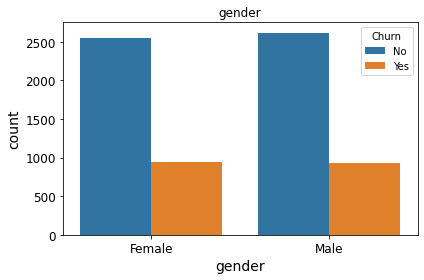

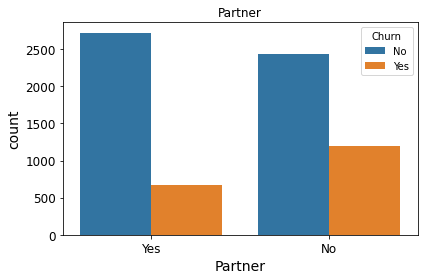

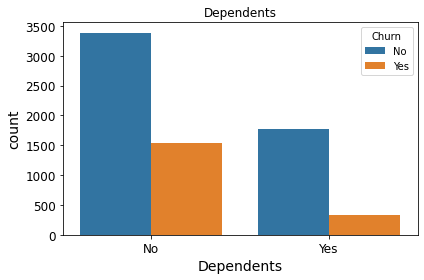

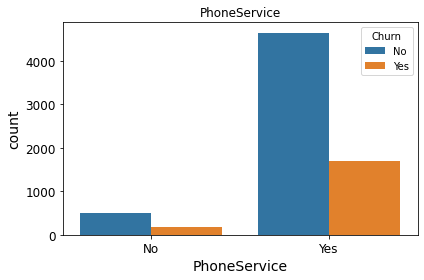

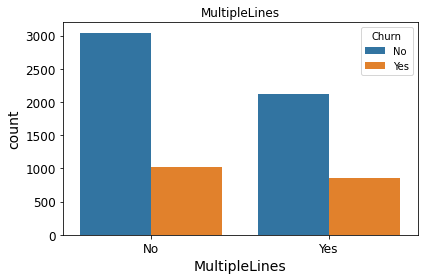

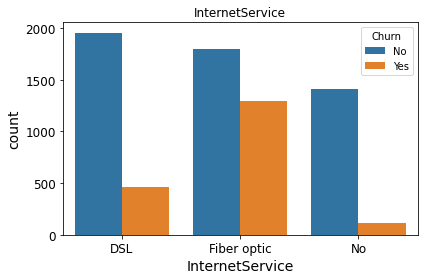

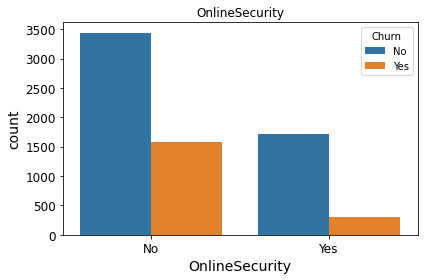

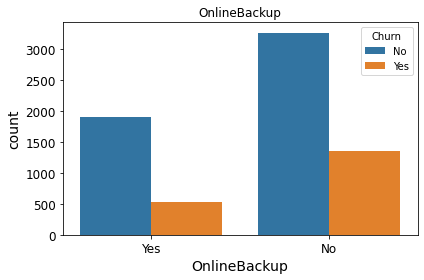

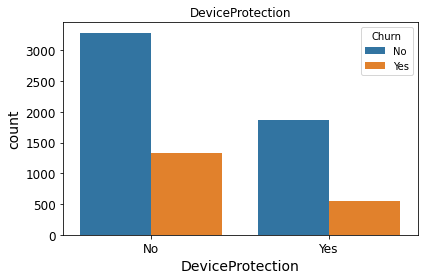

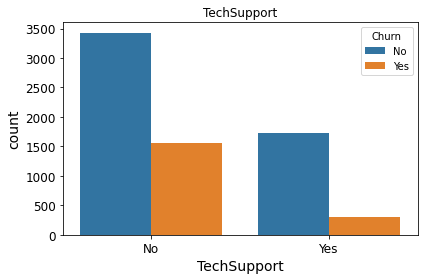

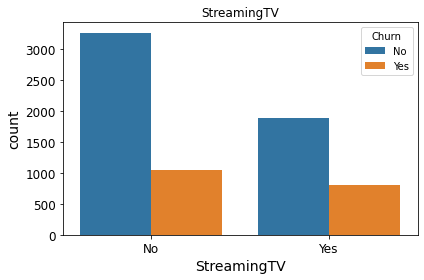

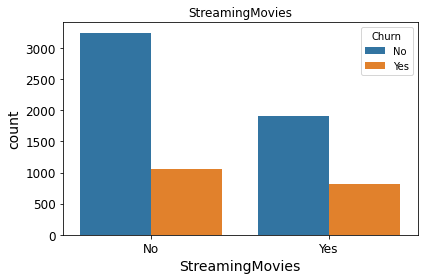

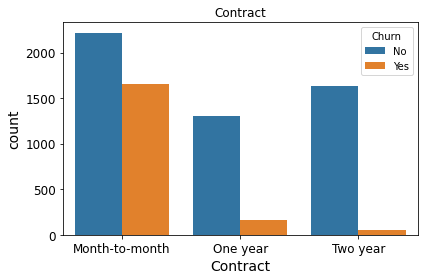

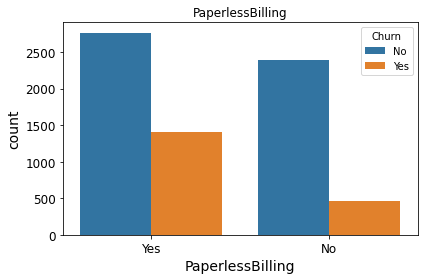

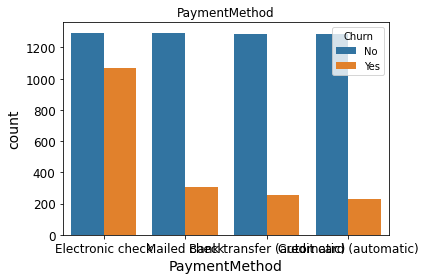

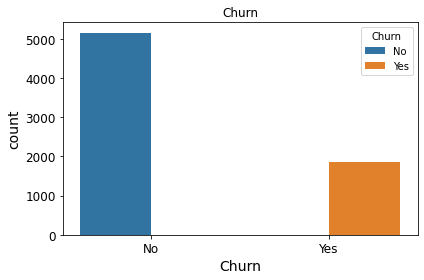

In [147]:
import seaborn as sns

for var in cats:
    sns.countplot(data=d_cats, x = var, hue = churn_label)
    plt.title(var)
    plt.tight_layout()
    plt.show()

The comments below are made on visual observations only. They should be taken into the recommendation stage to the company only after building our machine learning model and confirming the features correlations with the churn rates.<br>

<b> Below are the features which look enfavoring churn and which would need specific further investigation in a phase 2 and/or by customer service teams:</b>
<li><b>MultipleLines</b> : <br>comparing the proportions of the bars, it looks at a first glance that the <b>customers with multiple lines are churning more than those who don't</b>. And probably even more that the average churn rate. The reason behind this would probably need to be investigated</li>
<li><b>The Internet service with the optic fiber</b>: <br> It seems to be a factor prone to churn as the customers who churn are barely (a little bit lower) equal to those who don't. This service is <b>above the expected average churn rate</b>. <br><li><b>It is the same with Streaming services and Streaming Movies services</b>, where we can notice that there are more customers using the services who churn than those who don't.</li>
<br>We would need to <b>dig a little deeper into the numbers</b> and if confirmed, <b>recommend the customer service responsible for each product (or service) and the marketing teams to make a follow up on the customer journey and put the right tactics in place to adjust their operations according to the customers'expectations and needs.</b></li>
<br><br>
<b>Some other features characteristics listed below enfavor customer retention :</b>
<li><b>Online security, online-backup & Tech support </b>: <br>It seems that the <b>customers with online security, an online back-up and Tech Support are less prone to churn</b> and even below the average churn rate than those who don't. And for Tech Support, it even looks like this is a service that not only decreases churn rate but also when it is not subscribed, it is a service that increases churn.
<li>Finally the <b>automatic payment methods seem to be factors that prevent customers from churning</b> : 'Bank transfer (automatic)','Credit card (automatic)'. Regarding mailed check it looks to be also a predictor of loyal customers Vs churning customers. Whereas electronic check seems to be related to Churn. These observations can be further explored in another stage to find some attributes combinations.</li>
    
<br><b>Nothing specific to declare :</b>
<li>For gender, we don't see a distribution difference between males and females. And it looks like the proportions of churn are respected : about 1/3 churn for each group, which is approximately the churn rate we found above (27%)</li>
<li>For dependents, it looks like the customers who don't have dependents churn more (50% Vs 25% for those who have dependents.</li>
<li>Very few customers don't have phone services. Overall the churn rate seems respected (those who churn represent of those who stayed)</li>
<li>Customers with Paperless Billing seem to be more likely to churn that those who don't. The reason behind this is probably behavioral more than linked to the PaperlessBilling. We could ask to investigate it more if a clear correlation is shown through our ML model.</li>

<h4><li> For the numeric Variables </li></h4>

In [148]:
#defining the numerical features :
nums = list(df.select_dtypes('number').columns)

#Let's have a look at the summary and the distribution of our numeric data :
df[nums].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


<li><h4> Plotting Histograms for numeric attributes </h4></li>

In [149]:
#transforming churn into a numeric feature:
list_churn = df['Churn'].map({'Yes' : 1, 'No': 0})
df_churn_num = pd.DataFrame(list_churn)

df_nums = pd.merge(df[nums],df_churn_num,left_index = True, right_index =True)

df_nums.head()
df_nums.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0,1,29.85,29.85,0
1,0,34,56.95,1889.50,0
2,0,2,53.85,108.15,1
3,0,45,42.30,1840.75,0
4,0,2,70.70,151.65,1


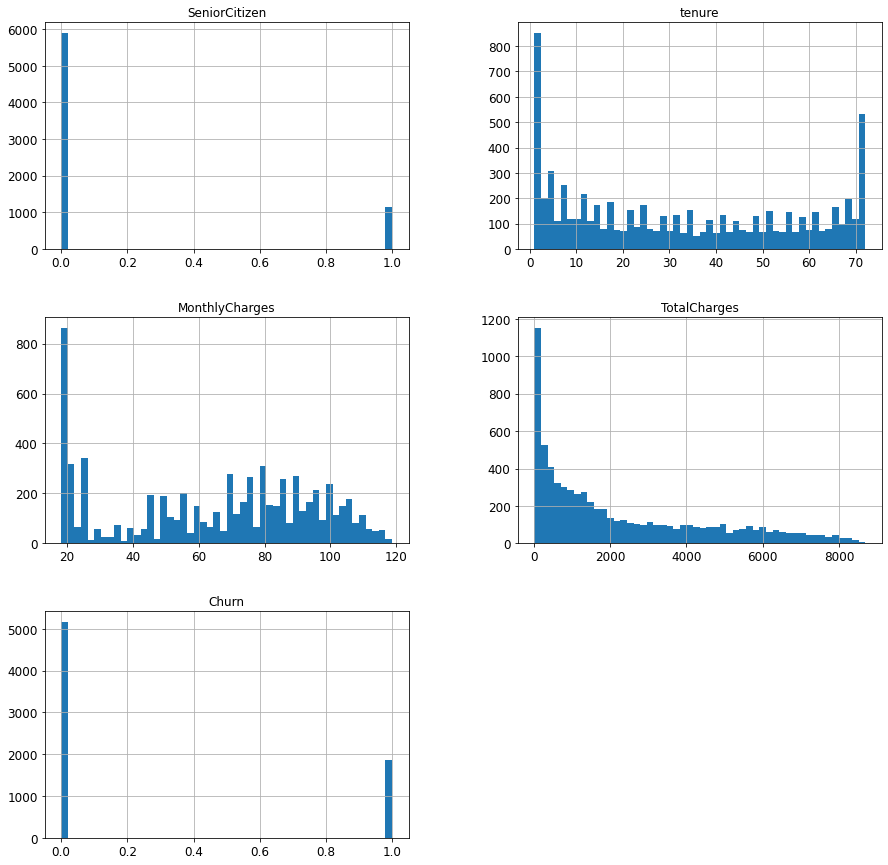

In [150]:
df_nums.hist(figsize =(15,15), bins = 50)
plt.show()

As we can see, our customers are well distributed across the tenure graph and present two spikes : 25% are under a tenure of 9.0 (acquired customers) and 25% are above 55.0 (loyal customers); the <b>remaining 50%</b> (!) are varying between 9.0 and 55.0, meaning that they are <b>still satisfied by the services provided...until some point in time or a trigerring event.</b> 

At some point in between, the Telecom company loses 25% of customers who could have stayed some more months and who decided to disrupt the services and quit the company. 

<b>Our model will consist at determining the features which will help the Telecom company identify these churners and support them in </b>identifying (then investigating on a one-on-one basis potential churn reasons and deploying) the right sales, marketing or customer support strategy to retain these customers.</b>
<br>
<br>
We also notice that we have a shape of a <b>fat tailed distribution</b> and that <b>75% of the customers Total Charges are below 4000</b> in local currency. But 25% of the customers are above, some of them reaching total charges of about 8000 in local currency.

This raises an important step in our data preparation to build the machine learning model : <b>some total charges go far beyond 4000 !!</b> 
This is the reason why, we will handle the category above 4000 as one category in a step below.
<br> It is important to have a <b>sufficient number of instances in our dataset for each stratum</b> in order to have a good <b>representation of all our customers'segments</b> or the <b>estimation of the most profitable and newly acquired customers will be biased</b>. 
This means that we will need to limit the number of Total charges categories. We will divide the total charges attribute by 1.5 (to limit the number of TotalCharges categories), and we will round it up using ceil then merge the categories greater than 3800 into category 3800.
    
<br> The company will certainly need to <b>dig more into their data and identify these highly profitable 25% of its customers</b>, providing them with different quality of service to retain the most profitable ones. <b>A customer segmentation analysis is recommended</b> to be developed as a <b>second phase analysis</b> (it is not the subject of this research) to <b>fine-tune the customer relationship strategy of the company</b> and adapt the strategy to each customer segment.

<li><h4> Searching for correlation : </h4></li> 
In order to identify correlation within the data, I will transform the target variable (Churn) into numeric data.
Secondly I will draw a <b>heatmap using the kendall method to observe the data correlation</b>. This method enables to measure the ordinal association between the variables :

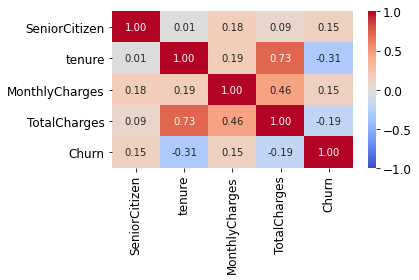

In [151]:
ax = sns.heatmap(df_nums.corr(method='kendall'), annot=True, fmt='.2f',vmin=-1, vmax=1, cmap='coolwarm')
plt.tight_layout()
plt.show()

<li><h4> Looking for correlation </h4></li>

In [152]:
df_nums.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
SeniorCitizen,1.000000,0.015683,0.219874,0.102411,0.150541
tenure,0.015683,1.000000,0.246862,0.825880,-0.354049
MonthlyCharges,0.219874,0.246862,1.000000,0.651065,0.192858
TotalCharges,0.102411,0.825880,0.651065,1.000000,-0.199484
Churn,0.150541,-0.354049,0.192858,-0.199484,1.000000


With no surprise, the total charges and the monthly charges are correlated (0.65) and Total charges are correlated with tenure (0.82). <br><b>The numeric variables correlated with churn are:</b>
<li>Tenure : negatively correlated, stronger correlation (-0.35)</li>
<li>Total Charges: second stronger correlation, negatively correlated (around -0.2)</li>
<li>Monthly charges and Senior citizen are positively correlated.</li>
    
The relationship between <b>totalcharges and tenure being negatively correlated with churn</b> is interesting, because it reminds us of the customer lifetime value (CLV = frequency * average basket * length of the relationship). 
<br> We recommend a second phase analysis where we will segment the customers with their CLV in order to enable specific targeting and invest more on retaining customers with a high CLV.

# 3. Data preparation for ML algorithm :

<h1> 3.1 Creating a test set :</h1>

<li><h2>Rebuilding our dataset :</li></h2>
First, we need to recreate our full dataset with our numeric and categorical features as per our data cleaning and preprocessing steps. 

In [153]:
#sanity check to make the merge :
len(d_cats) == len(df_nums)

True

In [154]:
#let's rebuild the full dataframe with our categorical and numeric features.
#The rows correspond to the same customerID so inner join will do the job:

df_full = d_cats.merge(df_nums, how = 'inner', right_index=True, left_index=True)

#dropping the column "Churn" (categorical from d_cats) and renaming Churn_y into Churn
df_full = df_full.drop('Churn_x', axis = 1).rename({'Churn_y': 'Churn'}, axis =1)

df_full.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,Female,Yes,No,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,0,1,29.85,29.85,0
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,0,34,56.95,1889.50,0
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,0,2,53.85,108.15,1
3,Male,No,No,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),0,45,42.30,1840.75,0
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0,2,70.70,151.65,1


<li><h2> Using random selection to create a test split </h2></li>

As seen above, the TotalCharges categories need to be limited and ceiled. The value_counts below confirms what we already knew and are considering as following steps :

In [155]:
df_full['TotalCharges'].value_counts()

20.20      11
19.75       9
20.05       8
19.65       8
19.90       8
           ..
6424.70     1
1474.35     1
6668.35     1
6096.90     1
5867.00     1
Name: TotalCharges, Length: 6530, dtype: int64

Customers are too largely distributed...many of them are alone. And indeed, we have a fat tail distribution.

(array([2709., 1228.,  671.,  508.,  454.,  412.,  395.,  310.,  223.,
         122.]),
 array([  18.8,  885.4, 1752. , 2618.6, 3485.2, 4351.8, 5218.4, 6085. ,
        6951.6, 7818.2, 8684.8]),
 <BarContainer object of 10 artists>)

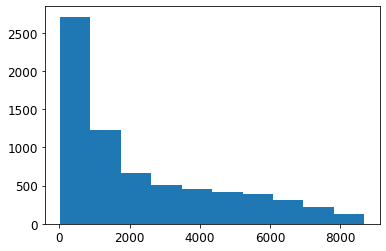

In [156]:
plt.hist(df_full['TotalCharges'])

The Pareto Law looks totally in action here. An interesting finding would be to see how it is applied and to search for our 20% most profitable customers (generating 80% of our revenues), the services they subscribed to and/or characteristics and behaviors...

In [157]:
# Dividing our data by 2266 (standard deviation) to limit the number of TotalCharges categories 
#And let us understand the distribution 
df_full["TotalCharges"] = np.ceil(df_full["TotalCharges"] / 2266)

# Label those above 4000 (75% of our data) as 4000
df_full["TotalCharges"].where(df_full["TotalCharges"] < 4000, 4000, inplace=True)

In [158]:
df_full["TotalCharges"].value_counts()

1.0    4373
2.0    1282
3.0     982
4.0     395
Name: TotalCharges, dtype: int64

(array([4373.,    0.,    0., 1282.,    0.,    0.,  982.,    0.,    0.,
         395.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

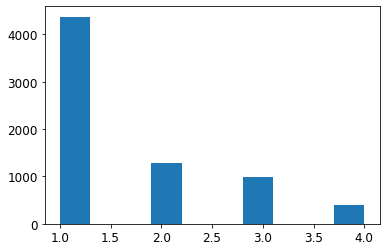

In [159]:
plt.hist(df_full['TotalCharges'])

This looks better categorization to analyze our customers'segments characteristics.

<h4><li>Using Stratified selection </li></h4>

We will use Scikit-Learn’s StratifiedShuffleSplit to do a stratified sampling and be able to have a representativity of the different categories within the test and the sample datasets.

In [160]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df_full, df_full["Churn"]):
    strat_train_set = df_full.iloc[train_index]
    strat_test_set = df_full.iloc[test_index]
strat_test_set

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
974,Female,Yes,Yes,Yes,No,DSL,No,Yes,No,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),0,59,75.95,3.0,0
619,Female,No,No,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),0,7,78.55,1.0,0
4289,Female,No,No,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,0,54,20.10,1.0,0
3721,Female,No,No,Yes,No,No,No,No,No,No,No,No,Month-to-month,No,Mailed check,0,2,20.65,1.0,1
4533,Female,Yes,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),0,71,105.15,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4829,Female,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),0,12,45.00,1.0,0
5176,Female,No,Yes,No,No,DSL,Yes,No,No,Yes,No,Yes,Month-to-month,No,Mailed check,0,26,45.80,1.0,0
2750,Male,No,No,Yes,No,No,No,No,No,No,No,No,One year,Yes,Mailed check,0,3,19.45,1.0,0
4432,Male,No,No,No,No,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Mailed check,0,37,40.55,1.0,0


In [161]:
X_train = strat_train_set.copy().drop(labels = ['Churn'],axis = 1)
y_train = strat_train_set['Churn'].copy()

X_test = strat_test_set.copy().drop(labels = ['Churn'],axis = 1)
y_test = strat_test_set['Churn'].copy()

<h4><li>Building a pipeline to preprocess the categorical and numeric input features :</li></h4>

In [162]:
#defining the list of numeric and categorical attributes for which columns we will apply 
#the transformations through the pipeline

num_attribs = list(X_train.select_dtypes('number').columns)
cat_attribs = list(set(X_train.columns) - set(num_attribs))

#we need to apply transformations into a single pipeline with standardization of the numeric values
#and transformation of the categorical values :

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

As Machine Learning algorithms don't perform well on numeric features with different scales, we will standardize the numeric features. 
For this we apply a standardization which will substract the mean value then dividing by the variance resulting in a distribution with unit variance. The numeric values will less be impacted by outliers.

In [163]:
#Building a pipeline for numeric attributes to standardize the values :

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

#Building the full_pipeline :
#For the categorical values transformation,we use directly the embedded OneHotEncoder from Scikit-Learn 
#OneHotEncoder converts integer categorical values into one-hot vectors (binary).

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

In [164]:
X_train_prepared = full_pipeline.fit_transform(X_train)

In [165]:
X_train_prepared

array([[-0.43931886,  1.3218163 ,  0.98155578, ...,  0.        ,
         1.        ,  0.        ],
       [-0.43931886, -0.26741023, -0.97154551, ...,  0.        ,
         1.        ,  0.        ],
       [-0.43931886,  1.4440645 ,  0.83706615, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.43931886,  0.14008375,  0.92674937, ...,  0.        ,
         0.        ,  1.        ],
       [-0.43931886, -0.9194006 ,  0.02991714, ...,  1.        ,
         0.        ,  1.        ],
       [ 2.27625101, -1.28614519,  0.32221802, ...,  0.        ,
         1.        ,  0.        ]])

In [166]:
X_train_prepared.shape

(5625, 38)

In [167]:
X_test_prepared = full_pipeline.fit_transform(X_test)

We will use a second pipeline both preprocessing the features with columTransformer (full_pipeline mentionned above) and building the models.
To <b>ensure future performance of our models and avoid data leakage, the pipeline will be passed at every step of our workflow </b>: from each fold of the cross-validations directly on the training and the test sets (not transformed), GridSearchcv and preprocessing with hyper parameters. 

# 4. Selecting and training a model

<h2>Training and evaluating on the training set & visualizing the models performance and interpreting the results </h2>

<h3>Stratified cross-validation</h3>

In order not to waste too much data of our dataset and contaminate it, risking to overfit our model. We will use a <b>10-fold cross-validation</b>, trying to find a <b>trade-off between the variance and the bias in our model selection</b>. Thus, we will define the best predictive model for our dataset.
<br>
We build our model while transforming our Data in order to avoid contaminating it as much as possible.

<h3><li> Logistic Regression model </h3></li> 

In [168]:
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression

lr_model = Pipeline(steps=[('preprocessor', full_pipeline),
                      ('classifier', LogisticRegression(solver="lbfgs", 
                        max_iter=300, class_weight="balanced"))])

scores = cross_val_score(lr_model, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(scores )

Scores: [-0.26820604 -0.26287744 -0.20071048 -0.25044405 -0.26465364 -0.23131673
 -0.25088968 -0.27046263 -0.23309609 -0.23131673]
Mean: -0.24639735023988166
Standard deviation: 0.02101252819789852


In [169]:
final_model = lr_model.fit(X_train, y_train)

In [170]:
round(lr_model.score(X_train, y_train),2)

0.76

In [171]:
round(lr_model.score(X_test, y_test),2)

0.73

In [172]:
y_predict_lr = lr_model.predict(X_test)
print(y_predict_lr)

[0 1 0 ... 0 0 0]


In [173]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(y_test, y_predict_lr)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.5237772168107693

<h4>Interpretation of the logistic regression results :<h/4>

The <b>scores are equivalent between the 10-folds</b> and the <b>mean score is about -0.25 and the RMSE is 0.52 (could be better)</b>.
<br>
The training score and the testing scores are equivalent, respectively 0.76 and 0.73, which is good.

<h3><li> SVM - Support Vector Machine </h3></li> 

In [174]:
from sklearn.svm import SVC

svc_model = Pipeline(steps=[('preprocessor', full_pipeline), ('classifier', SVC(random_state = 1))])

scores = cross_val_score(svc_model, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)

svc_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(svc_rmse_scores )

Scores: [0.45195451 0.45586761 0.41933721 0.42144975 0.44202023 0.43429495
 0.46208563 0.46592043 0.44641713 0.44441973]
Mean: 0.4443767179345892
Standard deviation: 0.014937147981111615


In [175]:
final_svc_model = svc_model.fit(X_train, y_train)

In [176]:
#training score :
print('training score is :', round(svc_model.score(X_train, y_train),2))

training score is : 0.82


In [177]:
#Making predictions :
y_predict_svc = final_svc_model.predict(X_test)

In [178]:
#Measuring SVC predictions accuracy :
accuracy_svc = final_svc_model.score(X_test,y_test)
print("SVC accuracy:",accuracy_svc)

SVC accuracy: 0.7874911158493249


In [179]:
#Classification report for the SVC model:

from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict_svc))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.48      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407



<h4>Interpretation of the SVM model results :<h/4>

With the SVC model, the standard deviation of 0.013 and the mean RMSE score across cross validations is of 0.44. 
<br>The training score is 0.82 Vs 0.79 for the testing score. The model <b>generalizes well to new data</b> (test data).
<br> The training accuracy is 0.79. <b> So the performance of the SVC is good.</b><br>

<b>Classification report analysis :</b>
<br>Now, let's have a look at the classification report to check the business application of this model for the telecom company.  <br>
The <b>recall is 48%, thus 52% of the churners are not identified.</b> 
AND the <b>precision is about 63% meaning that if churners are identified, only one third are false positives.</b> It is acceptable from expenses prospective as two third of churners are identified and a strategy can be put in place to retain them.<br>
In other words, the company can use this model to predict churn and recommend to develop retention strategies by the customer/sales or makerting services.

<h3><li> Decision Tree Regressor </h3></li> 

In [180]:
from sklearn.tree import DecisionTreeRegressor

tree_reg_model = Pipeline(steps=[('preprocessor', full_pipeline), ('classifier', DecisionTreeRegressor())])

scores = cross_val_score(tree_reg_model, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)

tree_reg_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(tree_reg_rmse_scores )

Scores: [0.51978803 0.51788613 0.49911111 0.5319499  0.47774634 0.5133643
 0.49637874 0.55740105 0.54796615 0.52577872]
Mean: 0.5187370451845162
Standard deviation: 0.02273634655417435


In [181]:
final_tree_reg_model = tree_reg_model.fit(X_train, y_train)

In [182]:
round(tree_reg_model.score(X_train, y_train),2)

0.99

In [183]:
#Making predictions :
y_predict_tree_reg = tree_reg_model.predict(X_test)

In [184]:
round(tree_reg_model.score(X_test, y_test),2)

-0.41

The training score is 0.99 with an RMSE score across each fold remains constant and is of 0.52 with a standard deviation of 0.024. 
But the test score is catastrophic with -0.41. The model is clearly <b>overfitting</b> the training data.

<h4>Interpreation of the decision tree regressor results :<h/4>

The model overfits.
AND we <b>WILL NOT USE this model to make churn predictions</b> and business recommendations.

<h3><li> Random Forest model </h3></li> 

In [185]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import metrics

rf_model = Pipeline(steps=[('preprocessor', full_pipeline), ('classifier', RandomForestClassifier(n_estimators=500 , 
                                                            oob_score = True, 
                                                            n_jobs = -1, 
                                                            random_state =50, 
                                                            max_features = "auto",
                                                            max_leaf_nodes = 30))])

scores = cross_val_score(rf_model, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)

forest_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(forest_rmse_scores )

Scores: [0.4499852  0.44602049 0.41077841 0.41721397 0.44202023 0.44641713
 0.456273   0.47349687 0.45431893 0.44840564]
Mean: 0.44449298747338106
Standard deviation: 0.017363710944537893


In [186]:
final_model = rf_model.fit(X_train, y_train)

In [187]:
print('The training score of the random forest model is : ', round(rf_model.score(X_train, y_train),2))

The training score of the random forest model is :  0.82


In [188]:
print('The testing score of the random forest model is : ', round(rf_model.score(X_test, y_test),2))

The testing score of the random forest model is :  0.79


In [189]:
# Make predictions
from sklearn.datasets import make_classification
from sklearn import metrics

y_predict_rf = rf_model.predict(X_test)
print ('Accuracy score of the random forest is :', round(metrics.accuracy_score(y_test, y_predict_rf),3))

Accuracy score of the random forest is : 0.792


In [190]:
#evaluating the accuracy
print(classification_report(y_test, y_predict_rf))

              precision    recall  f1-score   support

           0       0.82      0.91      0.87      1033
           1       0.66      0.45      0.54       374

    accuracy                           0.79      1407
   macro avg       0.74      0.68      0.70      1407
weighted avg       0.78      0.79      0.78      1407



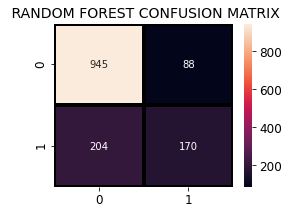

In [191]:
#Confusion matrix with random forest :
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_predict_rf),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

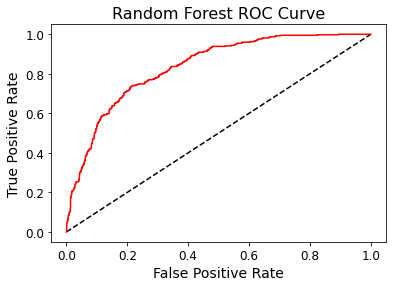

In [192]:
#plotting the ROC curve for random forest to show the trade-off between sensitivity (true positives) and the specificity (false positives):

from sklearn.metrics import roc_curve

y_rfpred_prob = rf_model.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();

<h4>Interpreation & estimation of the random forest predictions :<h/4>

With the random forest model, the training socre and the test score are very close and good, respectively 0.82 and 0.79. 
The<b> accuracy score is of 0.795, almost equal to the one obtained with the SVC (0.79)</b> and <b>it is close to 1, which is a pretty good performance</b>.

The RMSE score remains the same between the folds during the cross validation and is equal to the one obtained with the SVC, with a <b>mean score of 0.44 </b> + a standard deviation of 0.018.<br>
<br><b>Classification report :</b>
<br>
Let's analyse the classification report to consider if it can be used for a business application (or not).
The SVC was pretty good to predict with a precision of 0.63 and a recall of 0.48.<br>
For the random forest, the classification report shows a precision of 0.66 and a recall of 0.45</b> so the model is performing as good as the SVC model for both the precision and the recall with probably a little more false negative but less false positive. 
<br>We cannot really decide to discreminate between one or the other at this stage, this is the reason why we will be running the <b>GridSearch to fine-tune both models and find the best hyperparameters before comparing their performance and deciding which one is better.

# 5. Fine-tuning the models

<h3>5.1 GridSearchCV for SVM model</h3>

We start with the SVM model and apply the <b>Grid Search cross validation to select the best hyperparameters for the model</b>.

In [210]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

svc_model = SVC(random_state = 1)

parameters = {'C':[1,10,100],'gamma':[1,0.1,0.001], 'kernel':['linear','rbf']}

grid_search = GridSearchCV(estimator = svc_model,
                           param_grid = parameters,
                           scoring = 'neg_mean_squared_error',
                           cv = 5, verbose =2)

grid_search.fit(X_train_prepared, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.5s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.5s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.5s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.5s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.5s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   1.9s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   1.8s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   1.8s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   1.8s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   1.8s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.5s
[CV] END ......................C=1, gamma=0.1, k

GridSearchCV(cv=5, estimator=SVC(random_state=1),
             param_grid={'C': [1, 10, 100], 'gamma': [1, 0.1, 0.001],
                         'kernel': ['linear', 'rbf']},
             scoring='neg_mean_squared_error', verbose=2)

In [211]:
#displaying the best hyperparameter combination :
print('\nThe Best Parameters of our Given Model are:', grid_search.best_params_)


The Best Parameters of our Given Model are: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


In [212]:
#displaying the best estimator :
print('best estimator : ', grid_search.best_estimator_)

best estimator :  SVC(C=100, gamma=0.001, random_state=1)


In [213]:
#Displaying the score of each hyperparameter combination tested during the grid search:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print('RMSE score : {} for {}'.format(np.sqrt(-mean_score), params))

RMSE score : 0.44741231294833383 for {'C': 1, 'gamma': 1, 'kernel': 'linear'}
RMSE score : 0.4860726968948849 for {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
RMSE score : 0.44741231294833383 for {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
RMSE score : 0.4480079364376385 for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
RMSE score : 0.44741231294833383 for {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}
RMSE score : 0.4607240678178932 for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
RMSE score : 0.446815895469761 for {'C': 10, 'gamma': 1, 'kernel': 'linear'}
RMSE score : 0.49098540372058586 for {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
RMSE score : 0.446815895469761 for {'C': 10, 'gamma': 0.1, 'kernel': 'linear'}
RMSE score : 0.48110982807116576 for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
RMSE score : 0.446815895469761 for {'C': 10, 'gamma': 0.001, 'kernel': 'linear'}
RMSE score : 0.446616912651846 for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
RMSE score : 0.4464178411408855 for {'C': 100, 'gamma': 1, 'ker

In [214]:
#We define below the name of our best model :
best_svc_model = Pipeline(steps=[('preprocessor', full_pipeline), ('classifier', grid_search.best_estimator_)])

<h3>5.2 GridSearchCV for Random Forest model</h3>

We will now use the Random Forest model and apply the <b>Grid Search cross validation to select the best hyperparameters for the model</b>.

In [220]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2,4,6,8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2,3,4]},
]

forest_reg = RandomForestRegressor()

grid_search_rf = GridSearchCV(forest_reg, param_grid, cv =5, 
                           scoring = 'neg_mean_squared_error',
                           return_train_score = True)

grid_search_rf.fit(X_train_prepared, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [221]:
#displaying the best hyperparameter combination :
grid_search_rf.best_params_

{'max_features': 8, 'n_estimators': 30}

In [222]:
#displaying the best estimator :
print('best estimator : ',grid_search_rf.best_estimator_)

best estimator :  RandomForestRegressor(max_features=8, n_estimators=30)


In [223]:
#Displaying the score of each hyperparameter combination tested during the grid search:
cvres = grid_search_rf.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print('RMSE score : {} for {}'.format(np.sqrt(-mean_score), params))

RMSE score : 0.4364515243329763 for {'max_features': 2, 'n_estimators': 3}
RMSE score : 0.4080316650179793 for {'max_features': 2, 'n_estimators': 10}
RMSE score : 0.3943738317318213 for {'max_features': 2, 'n_estimators': 30}
RMSE score : 0.43212933719010177 for {'max_features': 4, 'n_estimators': 3}
RMSE score : 0.4033831188078879 for {'max_features': 4, 'n_estimators': 10}
RMSE score : 0.39093292594068596 for {'max_features': 4, 'n_estimators': 30}
RMSE score : 0.4348842405503979 for {'max_features': 6, 'n_estimators': 3}
RMSE score : 0.3980567876231223 for {'max_features': 6, 'n_estimators': 10}
RMSE score : 0.3905969940134132 for {'max_features': 6, 'n_estimators': 30}
RMSE score : 0.4386548837023074 for {'max_features': 8, 'n_estimators': 3}
RMSE score : 0.4005734162535251 for {'max_features': 8, 'n_estimators': 10}
RMSE score : 0.3888695770388026 for {'max_features': 8, 'n_estimators': 30}
RMSE score : 0.4494149527170314 for {'bootstrap': False, 'max_features': 2, 'n_estimators'

In [198]:
#We define below the name of our best model :
best_rf_model = Pipeline(steps=[('preprocessor', full_pipeline), ('classifier', grid_search.best_estimator_)])

<h3>Analyzing the best models, their errors and selecting the best model: </h3>

For the the Random Forest model, below is the relative importance of each attribute for making accurate predictions :

In [224]:
feature_importances = grid_search_rf.best_estimator_.feature_importances_
feature_importances

array([0.02232247, 0.18491608, 0.19572285, 0.02097083, 0.00444855,
       0.00441698, 0.01622941, 0.01816222, 0.01359877, 0.0129862 ,
       0.01219519, 0.01384444, 0.01577062, 0.01281773, 0.00890119,
       0.03473719, 0.01236845, 0.0145451 , 0.01475617, 0.01536701,
       0.01513412, 0.01303297, 0.01409047, 0.01959048, 0.02060045,
       0.00937585, 0.01297077, 0.01445389, 0.01751267, 0.09886722,
       0.00999807, 0.01391598, 0.01356412, 0.01314709, 0.02824687,
       0.01220241, 0.01203841, 0.01218071])

In [225]:
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.195722847629031, 'MonthlyCharges'),
 (0.18491607720308922, 'tenure'),
 (0.022322471820597403, 'SeniorCitizen'),
 (0.02097082776026479, 'TotalCharges'),
 (0.004448546039409312, 'No'),
 (0.004416980655719119, 'Yes')]

The <b>most important attributes for churn prediction confirmed with the random forest final model are tenure and monthly charges</b>.

# 6. Evaluating our best estimator on the test Set and conclusion

<h3>6.1  SVC model</h3>

In [215]:
#predictions using the SVC best model :
best_svc_predictions = best_svc_model.predict(X_test)
best_svc_predictions

array([0, 1, 0, ..., 0, 0, 0])

In [229]:
#evaluating the SVC best model performance :
best_svc_model.score(X_test, y_test)

0.7953091684434968

In [217]:
RMSE_best_model = mean_squared_error(y_test, best_svc_predictions, squared = False)
RMSE_best_model

0.4524277086524467

In [218]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,best_svc_predictions)

0.7953091684434968

The score is very good (close to 1) and is 

<h3>Random Forest model</h3>

In [226]:
#predictions using the random forest best model :
best_rf_predictions = best_rf_model.predict(X_test)
best_rf_predictions

array([0.        , 0.6       , 0.        , ..., 0.03333333, 0.        ,
       0.        ])

In [227]:
#evaluating the random forest best model performance :
best_rf_model.score(X_test, y_test)

0.22128876510585216

In [228]:
RMSE_best_model = mean_squared_error(y_test, best_rf_predictions, squared = False)
RMSE_best_model

0.38983433263549566

<h2><b>Conclusion :</b></h2>
<br>
With 0.795 testing accuracy, the <b>SVC model is confirming that is it the best model for the requested business application</b>.
Its training accuracy (0.79) and test accuracy are similar (0.795) and show that the <b>model generalizes very well to the test set (new data)</b>.
<br> Besides, its classification reports shows benefits providing a trade-off between the <b>precision of the model (0.63%, the recall 0.48 and optimizing the investments Vs other models</b> in order to retain churning customers.
<br> The best model fine-tuned for the random forest gave us only a score of 0.22, so it is not retained.

But the model has <b>some limitations :</b>
<br>
<li>The first one is the size of our Dataset, we <b>have only 7032 rows of customer data</b>, which is a small dataset considering the business application of the predictions, particularly when the <b>most profitable customers segment we need to retain is even the smallest (395</b> i.e 5.6% of our Dataset).</li> Besides, we identified <b>two attributes as important in our model predictions : the tenure and monthly charges</b>. And as we mentioned these are linked to the Customer Lifetime Value (CLV). We thus recommend to hold a <b>second study using unsupervised models to clusters customer segments</b> and link the business retention strategy to  the CLV.

<br>We can further <b>analyze some attributes combinations or add some features</b> (if we can have more data) to search for a better model performance. </li>

<br>From business prospective, we recommend the telecom company to run customer surveys and gather customers'feedbacks on services enfavoring churn or enfavoring customers'retention. 
<br>
<br>
Indeed, we have noticed that <b>some services are prone to churn </b>:
<li>Muliple line subscriptions</li>
<li>The Internet service with optic Fiber subscription</li>
<li>Streaming services</li>
<li>Streaming Movies services</li>
<br>
On the contrary, <b>other services, are more enfavoring customer retention or loyalty</b> :
<br><li>Customers with online security</li>
<li>Online back-up</li>
<li>Tech Support. Actually, customers with no Tech Support seems to be enfavoring customer churn.</li>
<li>The automatic payment methods seems to be a factor that prevent customers from churning (Bank transfer, Credit card, mailed check Vs electronic check (related to Churn?). 

<br>We would also like to analyze more the data we have, such as <b>modifying the features attributes</b> considering the following adjustments : 
<li>Customers with Fiber optic or with Multiple Lines Vs "no additional services"
<li>Group customers with streaming services and customers with streaming movies as customers with streaming Vs "no streaming services".</li>
<li>Regroup customers with automatic payments methods Vs "not automatic"</li>
<li>Group customers with full service support : online security & with online Back-up & Tech support Vs customers with "no customer support services".</li>
<br>
We need to push further this first shot analysis and modify our features by changing some attributes combinations.
<br>
<br>A direction for <b>even further analysis</b> would be to investigate : 
<li> Who are your loyal customers ? What are their common patterns (payments, services...etc) ?</li> 
<li>What are the loyal customers most common subscribed services?</li>
<li>How are your most profitable customers behaving and what are their subscribed services ?</li>
<li> How to develop a strategy to transform profitable customers into loyal ones ?</li> 
<li>How can we adjust your services to retain more customers continuously in the customer journey ?</li>